In [2]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
from pprint import pprint
from collections import Counter

client_credentials_manager = SpotifyClientCredentials(client_id='3ef39dfa962c41cea5f23b2c82f5476f', client_secret='1a85a7e5c3824be5a4f34b8b82be84fc')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

#NEED TO BRING IN CSV TO MAKE DATA VISUALIZATION WITH NEW DATAFRAMES FOR GENRE AND POPULARITY
bb_500_path = Path('Data/clean_bb_500.csv')
bb_500_path_api = pd.read_csv(bb_500_path)
bb_500_path_api.head()

,Rank,Artist,Song,Released,Decade
0,1,Aretha Franklin,Respect,1967,1960-1969
1,2,Public Enemy,Fight the Power,1989,1980-1989
2,3,Sam Cooke,A Change Is Gonna Come,1964,1960-1969
3,4,Bob Dylan,Like a Rolling Stone,1965,1960-1969
4,5,Nirvana,Smells Like Teen Spirit,1991,1990-1999


In [3]:
# importing raw csv
genre_500_df = bb_500_path_api
genre_500_df["Artist ID"] = ""
genre_500_df["Genres"] = ""
genre_500_df["Popularity"] = ""
#line below to limit results and can be deactivated once code is working
#genre_500_df = genre_500_df.loc[(genre_df["time_on_chart"] >50) , :]
genre_500_df.head()

,Rank,Artist,Song,Released,Decade,Artist ID,Genres,Popularity
0,1,Aretha Franklin,Respect,1967,1960-1969,,,
1,2,Public Enemy,Fight the Power,1989,1980-1989,,,
2,3,Sam Cooke,A Change Is Gonna Come,1964,1960-1969,,,
3,4,Bob Dylan,Like a Rolling Stone,1965,1960-1969,,,
4,5,Nirvana,Smells Like Teen Spirit,1991,1990-1999,,,


In [4]:
# Iterate over rows in the DataFrame
for index, row in genre_500_df.iterrows():
    artist = row["Artist"]
    
    # Search for the artist on Spotify
    result = sp.search(q=artist, type='artist', limit=1)
    
    if result['artists']['items']:
        artist_info = result['artists']['items'][0]
        artist_id = artist_info['id']
        
        # Update the DataFrame with the artist ID
        genre_500_df.loc[index, "Artist ID"] = artist_id
        
        # Create the artist URI
        urn = f"spotify:artist:{artist_id}"
        print(urn)
        
        # Fetch artist details
        artist_search = sp.artist(artist_id)
        
        # Update the DataFrame with the genre and popularity
        genres_500 = artist_search.get('genres', [])
        genres_500 = artist_search.get('genres', [])
        genre_500_df.at[index, "Genres"] = ', '.join(genres_500) if genres_500 else "Unknown"
        
        popularity = artist_search.get('popularity', 0)
        genre_500_df.loc[index, "Popularity"] = popularity
        
        #Print the genre and popularity
        pprint(genres_500)
        print(f"Popularity: {popularity}")
    else:
        print(f"No results found for artist: {artist}")
        
# Display the updated DataFrame
genre_500_df.head()

spotify:artist:7nwUJBm0HE4ZxD3f5cy5ok
['classic soul',
 'jazz blues',
 'memphis soul',
 'soul',
 'southern soul',
 'vocal jazz']
Popularity: 72
spotify:artist:6Mo9PoU6svvhgEum7wh2Nd
['conscious hip hop',
 'east coast hip hop',
 'golden age hip hop',
 'hardcore hip hop',
 'hip hop',
 'old school hip hop',
 'political hip hop']
Popularity: 56
spotify:artist:6hnWRPzGGKiapVX1UCdEAC
['classic soul', 'soul', 'vocal jazz']
Popularity: 68
spotify:artist:74ASZWbe4lXaubB36ztrGX
['classic rock',
 'country rock',
 'folk',
 'folk rock',
 'rock',
 'roots rock',
 'singer-songwriter']
Popularity: 73
spotify:artist:6olE6TJLqED3rqDCT0FyPh
['grunge', 'permanent wave', 'rock']
Popularity: 82
spotify:artist:3koiLjNrgRTNbOwViDipeA
['classic soul',
 'motown',
 'neo soul',
 'northern soul',
 'quiet storm',
 'soul',
 'vocal jazz']
Popularity: 74
spotify:artist:3WrFJ7ztbogyGnTHbHJFl2
['british invasion', 'classic rock', 'merseybeat', 'psychedelic rock', 'rock']
Popularity: 85
spotify:artist:2wIVse2owClT7go1WT98

,Rank,Artist,Song,Released,Decade,Artist ID,Genres,Popularity
0,1,Aretha Franklin,Respect,1967,1960-1969,7nwUJBm0HE4ZxD3f5cy5ok,"classic soul, jazz blues, memphis soul, soul, ...",72
1,2,Public Enemy,Fight the Power,1989,1980-1989,6Mo9PoU6svvhgEum7wh2Nd,"conscious hip hop, east coast hip hop, golden ...",56
2,3,Sam Cooke,A Change Is Gonna Come,1964,1960-1969,6hnWRPzGGKiapVX1UCdEAC,"classic soul, soul, vocal jazz",68
3,4,Bob Dylan,Like a Rolling Stone,1965,1960-1969,74ASZWbe4lXaubB36ztrGX,"classic rock, country rock, folk, folk rock, r...",73
4,5,Nirvana,Smells Like Teen Spirit,1991,1990-1999,6olE6TJLqED3rqDCT0FyPh,"grunge, permanent wave, rock",82


In [5]:
sorted_500_df = genre_500_df.sort_values(by='Popularity', ascending=False)
most_popular_song = sorted_500_df.iloc[0]['Song']
most_popular_artist = sorted_500_df.iloc[0]['Artist']
print(f'The most popular song based on Popularity score is {most_popular_song} by {most_popular_artist}.')
sorted_500_df.head()

The most popular song based on Popularity score is All Too Well by Taylor Swift.


,Rank,Artist,Song,Released,Decade,Artist ID,Genres,Popularity
66,69,Taylor Swift,All Too Well,2012,2010-2024,06HL4z0CvFAxyc27GXpf02,pop,100
23,25,Kanye West,Runaway,2010,2010-2024,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, hip hop, rap",92
42,45,Kendrick Lamar,Alright,2015,2010-2024,2YZyLoL8N0Wb9xBt1NhZWg,"conscious hip hop, hip hop, rap, west coast rap",92
70,73,Beyoncé,Formation,2016,2010-2024,6vWDO969PvNqNYHIOW5v0m,"pop, r&b",86
77,82,Adele,Rolling in the Deep,2011,2010-2024,4dpARuHxo51G3z768sgnrY,"british soul, pop, pop soul, uk pop",86


In [6]:
#count the total genres listed for each row
count_genre_500_df = pd.DataFrame(genre_500_df)

#split the genre into seperate entries 
genre_500_series = count_genre_500_df['Genres'].str.split(', ', expand=True).stack()

#new DF
count_genre_500_df = pd.DataFrame(genre_500_series, columns=['Genre'])

#Count the occurances
genre_500_count = count_genre_500_df['Genre'].value_counts()

#convert to new DF 
final_count_500_df = genre_500_count.reset_index()
final_count_500_df.columns = ['Genre', 'Count']

print(final_count_500_df)

                 Genre  Count
0                 rock     41
1         classic rock     26
2                 soul     17
3       permanent wave     14
4    singer-songwriter     13
..                 ...    ...
137      latin hip hop      1
138          reggaeton      1
139        trap latino      1
140      urbano latino      1
141         beatlesque      1

[142 rows x 2 columns]


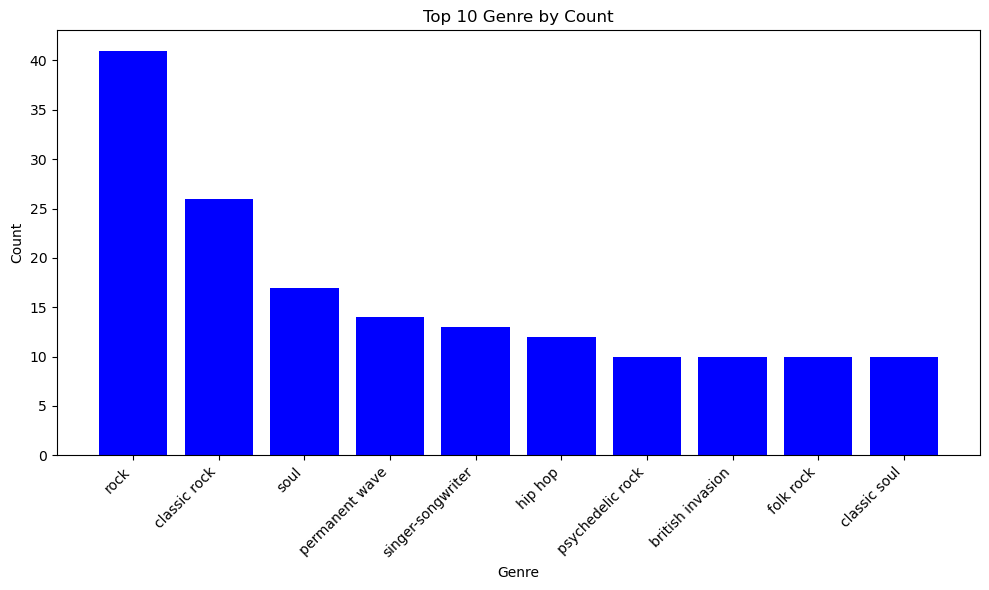

In [10]:
top_10_genres_500 = final_count_500_df.head(10)

plt.figure(figsize=(10, 6)) 
plt.bar(top_10_genres_500['Genre'], top_10_genres_500['Count'], color='blue')

plt.title('Top 10 Genre by Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.savefig("output_data/500_Genre_Bar.png")
plt.tight_layout()
plt.show()